In [1]:
%matplotlib inline

from inrad_reader import inrad_to_cf
import matplotlib.pyplot as plt

import pyart

In [2]:
test_file_path = '/Volumes/hard_lacie_hfs/data/indian_radar_data/'


In [3]:
radar = inrad_to_cf.read_multi_radar(test_file_path + 'T_HAHA00_C_DEMS_20180701080230*.nc')

In [4]:
display = pyart.graph.RadarDisplay(radar)

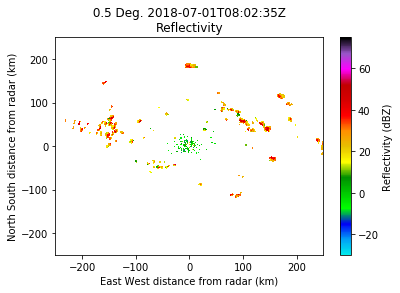

In [5]:
display.plot('reflectivity',0)

Now we can write the file out to a CF/Radial(ish) netcdf file. 

In [6]:
pyart.io.write_cfradial('test.nc', radar)

/Users/hard505/Python/pyart/pyart/io/cfradial.py:711: UserWarning: Warning, converting non-array to array:time
  warnings.warn("Warning, converting non-array to array:%s" % name)
/Users/hard505/Python/pyart/pyart/io/cfradial.py:711: UserWarning: Warning, converting non-array to array:fixed_angle
  warnings.warn("Warning, converting non-array to array:%s" % name)
/Users/hard505/Python/pyart/pyart/io/cfradial.py:711: UserWarning: Warning, converting non-array to array:sweep_mode
  warnings.warn("Warning, converting non-array to array:%s" % name)


## Gridding
This is a (very) brief example on gridding. The performance is not particularly tuned to this radar and there are better assortments of parameters, but this will show the general idea. 

In [7]:
grid = pyart.map.map_gates_to_grid(radar, grid_shape = (10,400,400), grid_limits=((0,5000),(-250000,250000), (-250000,250000)), fields=('reflectivity','differential_reflectivity'))

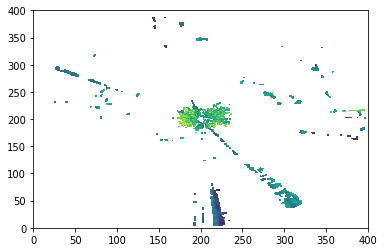

In [8]:
plt.pcolormesh(grid['differential_reflectivity'][0,:,:])